In [23]:
import numpy as np
import xarray as xr
import pyqtgraph as pg
from PySide6 import QtWidgets, QtCore, QtGui
import sys

from erlab.plotting.colors import (
    pg_colormap_names,
    pg_colormap_powernorm,
    pg_colormap_to_QPixmap,
)

class itimage(pg.ImageItem):
    def __init__(self, 
        *args,
        **kargs,
    ):
        super().__init__(*args, **kargs)

    def set_colormap(
        self,
        cmap,
        gamma,
        reverse=False,
        highContrast=False,
        zeroCentered=False,
        update=True,
    ):
        cmap = pg_colormap_powernorm(
            cmap,
            gamma,
            reverse,
            highContrast=highContrast,
            zeroCentered=zeroCentered,
        )
        self.set_pg_colormap(cmap, update=update)

    def set_pg_colormap(self, cmap: pg.ColorMap, update=True):
        self._colorMap = cmap
        self.setLookupTable(cmap.getStops()[1], update=update)
        
class glw(pg.GraphicsLayoutWidget):
    def __init__(self, plotitem, parent=None, **item_kw):
        super().__init__(parent=parent)
        self.ci.layout.setSpacing(0)
        self.ci.layout.setContentsMargins(0, 0, 0, 0)

        self.plotItem = plotitem
        self.addItem(self.plotItem)

data = xr.open_dataarray(
    "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
)




class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.pi = pg.PlotItem()
        self.gl = pg.PlotWidget(plotItem=self.pi)
        # self.gl = glw(self.pi)
        self.ii = itimage(image=data.sel(eV=0, method="nearest").values)
        self.pi.addItem(self.ii)
        
        
        self.layout = QtWidgets.QVBoxLayout(self)
        self.layout.addWidget(self.gl)
        
        # self.pi.addColorBar(self.ii)
        cbar = pg.HistogramLUTItem(image=self.ii)
        self.pi.layout.addItem( cbar, 2, 5 )
        self.pi.layout.setColumnFixedWidth(4, 5)
        self.ii.set_colormap("magma", 0.5)
        
        

    @QtCore.Slot()
    def magic(self):
        self.text.setText("hey")
    
if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    # demo.set_data(data)
    demo = MyWidget()
    demo.show()
    demo.raise_()
    qapp.exec()

In [17]:
demo.ii.image

<__main__.itimage(0x17b02ad60, parent=0x17b79a860, pos=0,0, flags=(ItemSendsGeometryChanges)) at 0x16516b3c0>

In [1]:
import xarray as xr

data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

from slicer import SlicerArray

sa = SlicerArray(data)

# sa.add_cursor()
# sa.set_indices(1, (796, 17, 82))

# # print([i.shape for i in sa.coords])
# # print(sa._obj.dims)
# # print(sa._values[1])
# # print(sa._indices[1])

# sa.swap_axes(0,1)
# # print(sa._values[1])
# # print(sa._indices[1])

# print([i.shape for i in sa.coords])
# print(sa._obj.dims)

# sa.span_bounds(1, 0)
# sa.span_bounds(1, 1)
# sa.span_bounds(1, 2)

In [5]:
type(data.shape)

tuple

In [27]:
sa.nanmin()

0.0

In [31]:
round(np.log10(abs(sa.nanmin())) + 3)

/var/folders/pm/phmf5d9d69s6znjj4sxp61yh0000gn/T/ipykernel_33078/2364280936.py:1: RuntimeWarning: divide by zero encountered in log10
  round(np.log10(abs(sa.nanmin())) + 3)


OverflowError: cannot convert float infinity to integer

In [6]:
import numpy as np
mx = 0.000000001

mn = -1.234112222222e+1

# round(np.log10(max(abs(mn), abs(mx))) + 3)
round(np.log10(abs(mx)) + 3)

-6

In [18]:
round(abs(np.log10(abs(4.96924931e-05))) + 3)

7

In [32]:
np.format_float_scientific(14237.137031508191, precision=7)
print(np.format_float_scientific(4.96924931, precision=7, unique=True, exp_digits=1))
print(np.format_float_scientific(4.96924931e-05, precision=7, unique=True))
print(np.format_float_scientific(14237.13703150819323, precision=7, unique=True))

4.9692493e+0
4.9692493e-05
1.4237137e+04


In [11]:
np.format_float_positional(14237.137031508191, precision=7)

'14237.1370315'

In [4]:
sa.absnanmax()

14237.137031508191

In [6]:
tuple[int]

tuple[int]

In [18]:

sa = SlicerArray(data)
print(sa._indices)
print(sa._values)
sa.add_cursor()
print(sa._indices)
print(sa._values)
# sa.set_indices(1, (796, 17, 82))
# print(sa._indices)
# print(sa._values)

[[519, 41, 83]]
[[-0.5008161067962646, -0.5199999999999994, -0.10999999999999854]]
[[519, 41, 83], [519, 41, 83]]
[[-0.5008161067962646, -0.5199999999999994, -0.10999999999999854], [-0.5008161067962646, -0.5199999999999994, -0.10999999999999854]]


In [16]:
lst = [[519, 41, 83], [519, 41, 83]]
lst[1][0] = 796
lst[1][1] = 17
lst[1][2] = 82
lst

[[519, 41, 83], [796, 17, 82]]

In [19]:
# sa._indices = [[519, 41, 83], [519, 41, 83]]
sa._indices[1][0] = 796
sa._indices[1][1] = 17
sa._indices[1][2] = 82
sa._indices

[[796, 17, 82], [796, 17, 82]]

In [14]:

i = 1
ax1 = 0
ax2 = 1
print(sa._values[i])
print(sa._indices[i])


sa._values[i][ax1], sa._values[i][ax2] = (
    sa._values[i][ax2],
    sa._values[i][ax1],
)
sa._indices[i][ax1], sa._indices[i][ax2] = (
    sa._indices[i][ax2],
    sa._indices[i][ax1],
)

print(sa._values[i])
print(sa._indices[i])

[-0.9999999999999998, -0.04819762706756592, -0.12999999999999856]
[17, 796, 82]
[-0.04819762706756592, -0.9999999999999998, -0.12999999999999856]
[796, 17, 82]


In [2]:
sa._indices

[[796, 17, 82], [796, 17, 82]]

In [3]:
sa._values

[[-0.5199999999999994, -0.5008161067962646, -0.10999999999999854],
 [-0.9999999999999998, -0.04819762706756592, -0.12999999999999856]]

In [11]:
import xarray as xr
import numpy as np
import numbagg
from PySide6 import QtWidgets, QtCore, QtGui
import pyqtgraph as pg
import colorsys
import darkdetect
from matplotlib import colors as mcolors
from pyqtgraph.dockarea.Dock import Dock, DockLabel
from pyqtgraph.dockarea.DockArea import DockArea
import sys
import itertools

from erlab.plotting.colors import (
    pg_colormap_names,
    pg_colormap_powernorm,
    pg_colormap_to_QPixmap,
)


<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/70502d64-620f-4e97-bb77-2f2666bdb83e_2022-09-13_11-34-56.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
import PySide6
import PySide6.sip

ModuleNotFoundError: No module named 'PySide6.sip'

In [7]:
np.around([123.1235, 12346.1235], 6)

array([  123.1235, 12346.1235])

In [91]:
data.max()

<xarray.DataArray ()>
array(14237.13703151)
Coordinates:
    x        float64 ...
    y        float64 ...
    z        float64 ...
    hv       float64 ...

In [96]:
for i, v in sorted(enumerate(["z",3,"a",8]), reverse=True):
    print(i,v)

3 8
2 a
1 3
0 z


In [ ]:
it = iter(s)
a = next(it, None)
return all(a == b for b in it)


In [8]:

from PySide6 import QtWidgets, QtCore, QtGui
import sys
class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        print(QtGui.QFontMetrics(self.font()).height())
        print(QtGui.QFontMetrics(self.font()).boundingRect('X').height())
        self.button = QtWidgets.QPushButton("Click me!")
        self.text = QtWidgets.QLabel("Hello World",
                                     alignment=QtCore.Qt.AlignCenter)

        self.layout = QtWidgets.QVBoxLayout(self)
        self.layout.addWidget(self.text)
        self.layout.addWidget(self.button)

        self.button.clicked.connect(self.magic)

    @QtCore.Slot()
    def magic(self):
        self.text.setText("hey")
    
if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    # demo.set_data(data)
    demo = MyWidget()
    demo.show()
    demo.raise_()
    qapp.exec()

16
15


NameError: name 'data' is not defined

In [ ]:
\bT12\parens{\muu1-\muu2}+\bT13\parens{\muu1-\muu3}+\bT14\parens{\muu1-\muu4}+\dots

In [113]:
import numba
# @numba.njit
def is_even(arr):
    diff = np.diff(arr)
    d0 = diff[0]
    return np.all(diff == diff[0])
    # return len(set(diff)) == 1
    # return np.amin(diff) == np.amax(diff)

is_even(data.eV.values)
%timeit is_even(data.eV.values)

14.6 µs ± 98.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [92]:
np.log10(14237.13703151)

4.153422665113727

In [12]:
data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

In [28]:
import pandas as pd

df = data.rename('hello').to_dataframe()
df['hello'].value

AttributeError: 'Series' object has no attribute 'value'

: 

In [30]:
lims = data._slicer.lims[0]
inc = data._slicer.incs[0]
(lims[1] - lims[0])/inc

1039.0

In [36]:
arr = np.arange(30).astype(float)*0.25 + 3
arr

array([ 3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
        5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,
        7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,
        9.75, 10.  , 10.25])

In [57]:
np.searchsorted(arr+(0.25/2), 3.126)

1

In [73]:
import numba
@numba.njit(fastmath=True, cache=True)
def index_of_value_jit(arr, val):
    inc = arr[1] - arr[0]
    
    ind = min(
        round((val - arr[0]) / inc),
        len(arr) - 1,
    )
    if ind < 0:
        return 0
    return ind
@numba.njit(fastmath=True, cache=True)
def nearest_value_jit(arr, val):
    inc = arr[1] - arr[0]
    
    ind = max(min(
        round((val - arr[0]) / inc),
        len(arr) - 1,
    ), 0)
    return inc * ind + arr[0]

@numba.njit(fastmath=True, cache=True)
def index_of_value_regular_jit(arr, val):
    return np.searchsorted((arr[:-1] + arr[1:]) / 2, val)


arr = data.eV.values
nearest_value_jit(arr,-0.73142412)
# %timeit index_of_value_jit(arr, -0.73142412)


# %timeit index_of_value_regular_jit(arr, -0.73142412)

-0.7312103509902954

In [88]:
np.log10(12144.2325)

4.084370073151247

In [87]:
import numpy as np
np.format_float_positional(12331329.93532, 7, fractional=False)

'12331330.'

In [69]:
np.diff(arr)

array([0.001634, 0.001634, 0.001634, ..., 0.001634, 0.001634, 0.001634])

array([-1.348046  , -1.346412  , -1.344778  , ...,  0.34477979,
        0.34641379,  0.34804779])

In [ ]:
5.625

In [37]:
(5.5222111 - arr[0])/0.25

10.0888444

In [29]:
data.shape

(1040, 83, 167)

In [25]:
import numbagg
numbagg.nanmax(data.values)

14237.137031508191

In [16]:
np.format_float_positional(123.123512, 6, fractional=False)

'123.124'

In [4]:
from arpes.utilities.conversion.core import grid_interpolator_from_dataarray
data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

interpolator = grid_interpolator_from_dataarray(data, method="linear")


Interpolator(lower_corner=[-1.3488630056381226, -1.34, -1.77], delta=[0.0016340017318725586, 0.020000000000000018, 0.020000000000000018], shape=[1040, 83, 167], data=array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..

In [14]:
demo.profiles[0].plotItem.vb.autoRangeEnabled()

[False, True]

In [52]:
%autoreload 2
%gui qt
from imagetool_new import ImageSlicerArea
if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )
    demo = ImageSlicerArea()
    demo.set_data(data)
    demo.show()
    demo.raise_()

In [6]:
data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

lims = data._slicer.lims
incs = data._slicer.incs
import numba
@numba.njit
def index_of_value(axis, val, lims, incs, shape):
    ind = min(
        round((val - lims[axis][0]) / incs[axis]),
        shape[axis] - 1,
    )
    if ind < 0:
        return 0
    return ind

index_of_value(0, 12.3222, lims, incs, data.shape)

1039

In [7]:
data._slicer.indices

[519, 41, 83]

In [10]:
@numba.njit
def _bin_slice(center, window):
    return center - window // 2, center + (window - 1) // 2 + 1

slice(*_bin_slice(3, 1))

slice(3, 4, None)

[0, 1]

In [14]:
@numba.njit
def return_transposed(arr):
    if arr.ndim == 2:
        return arr.T
    elif arr.ndim == 3:
        return arr.transpose(1, 2, 0)
    elif arr.ndim == 4:
        return arr.transpose(1, 2, 3, 0)



array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [ 0.],
         [

In [68]:
any(elem not in [0, 1] for elem in [0, 2])

True

In [39]:

clr = pg.mkColor("w")
clr.setAlphaF(0.75)
clr

PySide6.QtGui.QColor.fromRgbF(1.000000, 1.000000, 1.000000, 0.749996)

In [49]:
clr.toTuple()

(255, 255, 255, 191)

In [98]:
profile_axes = [1, 2, 3, 6]
profile_axes_new = []
for i in range(2):
    profile_axes_new += [10 * i + p for p in profile_axes]
profile_axes_new

[1, 2, 3, 6, 11, 12, 13, 16]

In [110]:
profile_axes = [1, 2, 3, 6]
profile_axes = [10 * i + p for i in range(6) for p in profile_axes]
profile_axes

[1,
 2,
 3,
 6,
 11,
 12,
 13,
 16,
 21,
 22,
 23,
 26,
 31,
 32,
 33,
 36,
 41,
 42,
 43,
 46,
 51,
 52,
 53,
 56]

In [2]:
data = xr.open_dataarray(
    "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
)

In [4]:
%gui qt
app = pg.mkQApp("Crosshair Example")
win = pg.GraphicsLayoutWidget(show=True)
win.setWindowTitle('pyqtgraph example: crosshair')
# label = pg.LabelItem(justify='right')
# win.addItem(label)
p1 = win.addPlot()
i1 = pg.ImageItem()
i1.setImage(data.sel(eV=-0.5, method="nearest").values)
i2 = pg.ImageItem()
i2.setImage(data.sel(eV=-0, method="nearest").values)
p1.addItem(i1)
p1.addItem(i2)
i2.setVisible(False)
pg.exec()

0

In [83]:
for i in range(1, 1):
    print(i)

1


In [68]:
demo.profiles[0].

AttributeError: 'ItoolPlotDataItem' object has no attribute 'listDataItems'

In [62]:
# demo._container_bottom.stretch()
%gui qt

pw = pg.PlotWidget()
img = pg.PlotDataItem()

pw.addItem(img)
rect, vals = data._slicer.slice_with_coord((0,))
# img.setImage(img=vals)
img.setData(rect, vals)
pw.show()

qt.pointer.dispatch: delivering touch release to same window QWidgetWindow(0x16a0b32d0, name="ImageSlicerClassWindow") not QWidgetWindow(0x2e428e290, name="PlotWidgetClassWindow")
qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x16a0b32d0, name="ImageSlicerClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=3 ts=0 pos=0,0 scn=652.92,619.905 gbl=652.92,619.905 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-652.92,-619.905 last=-652.92,-619.905 Δ 652.92,619.905) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=4 ts=0 pos=0,0 scn=637.8,670.845 gbl=637.8,670.845 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-637.8,-670.845 last=-637.8,-670.845 Δ 637.8,670.845) : no target window


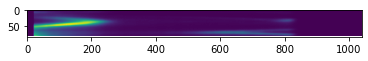

In [44]:
from matplotlib import pyplot as plt
plt.imshow(vals)

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [36]:
rect

(-1.3496800065040588, -1.35, 1.699361801147461, 0.28000000000000136)

In [40]:
rect

PySide6.QtCore.QRectF(-1.349680, -1.350000, 1.699362, 1.660000)

In [ ]:
QtCore.QRectF

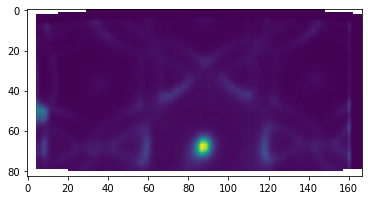

In [30]:
rect, arr = data._slicer.slice_with_coord((1, 2))

import matplotlib.pyplot as plt

plt.imshow(arr, )

(<__main__.ItoolPlotWidget(0x1360d9d10) at 0x2883ebe80>,
 <__main__.ItoolPlotWidget(0x28c736770) at 0x285c09ec0>,
 <__main__.ItoolPlotWidget(0x28c864ca0) at 0x28a0ea240>)

In [28]:
demo._container_top.stretch()

(55, 25)

In [69]:
l1 = [0, 1, 2, 3]
l2 = l1
l2.remove(3)

In [76]:
dat.dims

('eV', 'kx', 'ky')

In [51]:
demo.get_axes(1).addItem(xImageItem())

In [ ]:
pg.PlotWidget

In [3]:
[i if i not in (1, 2) else for i in range(4)]

[0, '', '', 3]

[0, 3]

In [78]:
dat_4d = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/TiSe2/220410_ALS_BL4/map_mm_4d.nc"
    )

In [79]:
dat_4d.values.shape

(3, 1040, 108, 608)

In [86]:
dat_4d._slicer.extract_slice((2,3)).shape

(1040, 3)

In [53]:
pw=  demo.get_axes(1)

In [ ]:
pw.find

In [5]:
demo.getLargeContainer(demo.get_dock(0))

<pyqtgraph.dockarea.Container.HContainer(0x281366d90) at 0x2812206c0>

In [138]:
demo.topContainer

<pyqtgraph.dockarea.Container.VContainer(0x2d0bb1f30) at 0x2d347a280>

In [109]:
demo.get_dock(1).container().container().container().container()

<__main__.DockDemo(0x2d0375eb0) at 0x2d17a6680>

In [147]:
i=0
j=0
while i != 5:
    j = i
    i = i + 1
    print(j)
    # print(i)
    

0
1
2
3
4


In [112]:
demo.topContainer.

<pyqtgraph.dockarea.Container.VContainer(0x2d09215a0) at 0x2af23cf80>

In [97]:
list(demo.docks.keys())

['1', '0', '2', '3', '4', '5', '9']

In [89]:
len(dict(a=1, b=3))

2

In [57]:
demo.docks[0].container()

<pyqtgraph.dockarea.Container.HContainer(0x298061e40) at 0x29780b400>

In [58]:
demo.docks[3].container()

<pyqtgraph.dockarea.Container.HContainer(0x298077a60) at 0x28d045ec0>

In [49]:
demo.docks[3].container().sizes()

[72, 641]

In [30]:
containers, _ = demo.dockarea.findAll()

[357, 356]

In [114]:
demo.

PySide6.QtCore.Qt.DockWidgetAreaSizes.NDockWidgetAreas

In [3]:
ls = [None, 13, None]

tuple(i for i, x in enumerate(ls) if x != None)

(1,)

In [174]:
import pyqtgraph.jupyter

pyqtgraph.jupyter.GraphicsLayoutWidget